In [16]:
%load_ext autoreload
%autoreload 2
from utils import Metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import pickle

with open("metrics.pkl", "rb") as f:
    metrics_list = pickle.load(f)

In [48]:
top5_metrics = metrics_list[:5]

In [10]:
k_vals = [1, 3, 5, 10]

In [15]:
sns.set_theme()

In [110]:
metrics_str = []
precisions = []
ncdg = []

for m in top5_metrics:
    metrics_str += [str(m)]*4
    precisions += m.rp_at_k
    ncdg += m.ndcg_at_k

In [112]:
df = pd.DataFrame.from_dict({'k': k_vals*5,
                       'metric': metrics_str,
                       'precision': precisions,
                        'ncdg': ncdg})

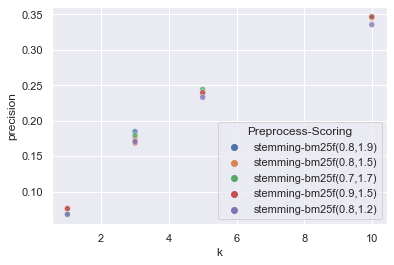

In [113]:
scatter = sns.scatterplot(data=df, x="k", y="precision", hue="metric", alpha=0.75)
scatter.legend(title="Preprocess-Scoring")

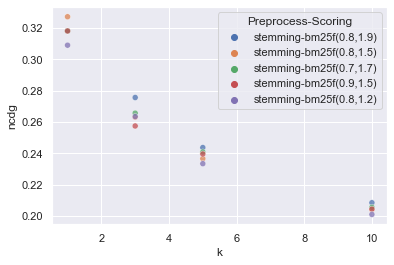

In [114]:
scatter = sns.scatterplot(data=df, x="k", y="ncdg", hue="metric", alpha=0.75)
scatter.legend(title="Preprocess-Scoring")

In [120]:
mrr_records = [[str(x), x.MRR] for x in metrics_list]

In [122]:
pd.DataFrame(mrr_records, columns=["Configuration", "MRR"])

,Configuration,MRR
0,"stemming-bm25f(0.8,1.9)",0.457922
1,"stemming-bm25f(0.8,1.5)",0.456043
2,"stemming-bm25f(0.7,1.7)",0.454690
3,"stemming-bm25f(0.9,1.5)",0.448817
4,"stemming-bm25f(0.8,1.2)",0.446039
5,"stemming-bm25f(0.9,1.2)",0.445437
6,"stemming-bm25f(0.3,1.2)",0.420783
7,"stemming-bm25f(0.4,1.7)",0.441346
8,"stemming-bm25f(0.75,1.2)",0.440368
9,"stemming-bm25f(0.5,1.5)",0.437089


In [126]:
rp_records = [[str(x), x.rps['mean'], x.rps['min'], x.rps['first_quartile']] for x in metrics_list]

In [127]:
pd.DataFrame(rp_records, columns=["Configuration", "Mean", "Min", "1st Quartile"])

,Configuration,Mean,Min,1st Quartile
0,"stemming-bm25f(0.8,1.9)",0.345956,0.0,0.139163
1,"stemming-bm25f(0.8,1.5)",0.344740,0.0,0.128233
2,"stemming-bm25f(0.7,1.7)",0.346508,0.0,0.142857
3,"stemming-bm25f(0.9,1.5)",0.346317,0.0,0.108836
4,"stemming-bm25f(0.8,1.2)",0.335336,0.0,0.108836
5,"stemming-bm25f(0.9,1.2)",0.342522,0.0,0.100862
6,"stemming-bm25f(0.3,1.2)",0.331277,0.0,0.054741
7,"stemming-bm25f(0.4,1.7)",0.330632,0.0,0.069581
8,"stemming-bm25f(0.75,1.2)",0.332785,0.0,0.108836
9,"stemming-bm25f(0.5,1.5)",0.331823,0.0,0.069581
